<span style="text-transform: uppercase;">ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА</span>

In [188]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import plotly.offline as pyo

<span style="text-transform: uppercase;">Часть 1. Загрузка и обработка данных.</span>

In [189]:
# Прочитаем файл и посмотрим на структуру файла
data = pd.read_csv('data/ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [190]:
# Узнем  размерность наших данных с помощью метода shape
data.shape

(607, 11)

In [191]:
# Посмотрим на наличие дубликатов с помощью метода duplicated(), передадим параметр keep=False, чтобы посмотреть все вхождения дупликатов
duplicates = data[data.duplicated(keep=False)]
duplicates.shape

(71, 11)

In [192]:
# В данных 71 дупликат, избавимся от дупликатов используя метод drop_duplicates(), оставив только 
# Первое вхождение, используем параметр keep='first'
data = data.drop_duplicates(keep='first')

In [193]:
# С помощью метода info() посмотрим информацию о типах данных в таблице, а также информацию о заполненности
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


Видим, что пропуски в данных отсутствуют.

In [194]:
# Удалим признаки зарплата и валюта выплачиваемой зарплаты, оставим только признак зарплата в USD
data = data.drop(columns=['salary', 'salary_currency'], axis=1)

In [195]:
# Переименуем признак salary in usd в salary с помощщью метода rename() для удобства
data.rename(columns={'salary_in_usd':'salary'}, inplace=True)

Посмотрев на наши данные можем классифицировать признаки на числовые (колличесвтенные) и категориальные.  
Признак года определим к категориальным (в наших данных рассматриваются только три года)
Числовые: salary  
Категориальные: work_year, experience_level, employment_type, employee_residence, remote_ratio, company_location, company_size

In [196]:
# Посмотрим на основные статистические характеристики числового признака с помощью метода describe()
data['salary'].describe()

count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary, dtype: float64

In [197]:
# Приведем категориальные признаки к типуданных object с помощью метода astype(), затем посмотрим описательную статистику для этих признаков
cat_col = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
data[cat_col] = data[cat_col].astype('object')
data[cat_col].describe(include='object')

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565
unique,3,4,4,50,57,3,50,3
top,2022,SE,FT,Data Scientist,US,100,US,M
freq,278,243,546,130,295,346,318,290


ЧАСТЬ 2.1 ВИЗУАЛЬНЫЙ АНАЛИЗ ДАННЫХ

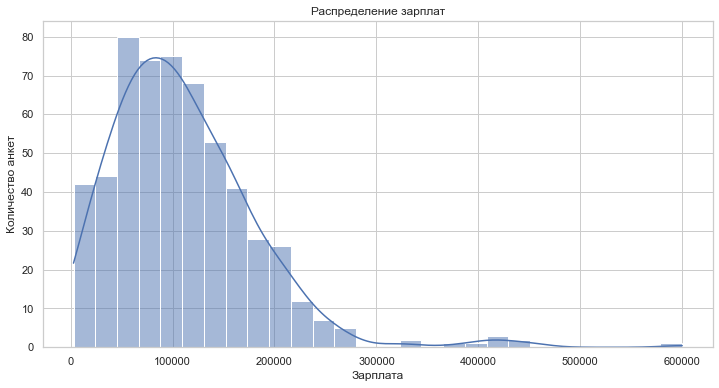

In [198]:
# Построим гистограмму распределения колличества анкет по зарплатам
# Настройка стиля графика
sns.set(style="whitegrid")

# Создание графика
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='salary', kde=True)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество анкет')

# Отображение графика
plt.show()

На данном графике видим, что большее количество заработных плат расположено в промежутке от 60 тысяч до 150т

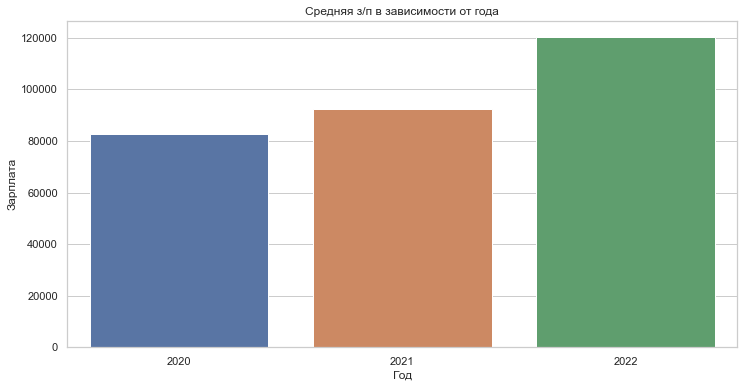

In [199]:
# Теперь построим столбчатую диаграмму распределения по годам
# Настройка стиля графика
sns.set(style="whitegrid")

# Группируем данные
bar_data3 = data[data['salary']<300000].groupby('work_year', as_index=False).mean()

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data3_filtered, x='work_year', y='salary')
plt.title('Средняя з/п в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Зарплата')

# Отображение графика
plt.show()

На данном графике мы видим, что средняя з/п растет с каждым годом.

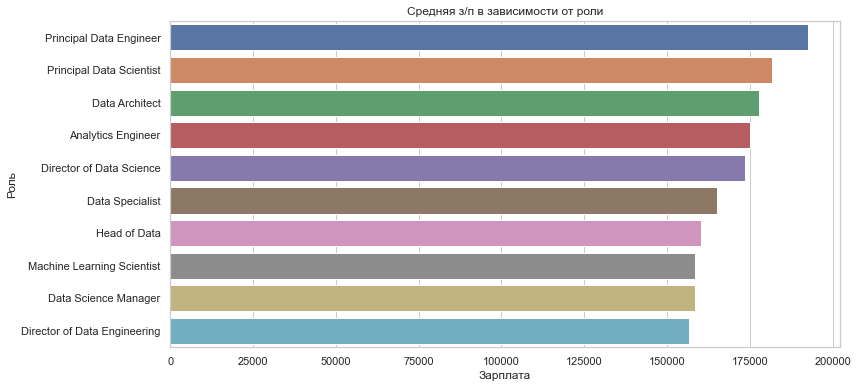

In [200]:
# Построим столбчатую диаграмму распределения зарплат по ролям, посмотрим
# Группируем данные
bar_data4 = data[data['salary']<300000].groupby('job_title', as_index=False).mean().sort_values(by='salary', ascending=False).head(10)

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(data=bar_data4, x='salary', y='job_title', orient='h')
plt.title('Средняя з/п в зависимости от роли')
plt.xlabel('Зарплата')
plt.ylabel('Роль')

# Отображение графика
plt.show()

По этому графику видим, что  зарплаты выше у руководителей/высоких должностей. Зависимость наблюдается.

In [201]:
# Создание списков ключевых слов по ролям
science  = ['science', 'scientist']
engineering = ['engineer', 'engineering']
additional_condition = 'data'

# Создание функции для формирования новых датасетов, включающих только данные по определенным ролям
def search_jobs(data, keywords, additional_condition):
    matching_rows = []
    for index, row in data.iterrows():
        keyword_match = any(keyword.lower() in row['job_title'].lower() for keyword in keywords)
        condition_match = additional_condition in row['job_title'].lower()
        if keyword_match and condition_match:
            matching_rows.append(index)
    return data.loc[matching_rows]

# Создание датасета, включающего только 2022 год
data_year_2022 = data[data['work_year'] == 2022]

# Создание датасетов включающих только определенных специалистов
data_scientists = search_jobs(data, science, additional_condition)
data_engineer = search_jobs(data, engineering, additional_condition)

# Создание датасетов включающих только определенных специалистов в 2022 году
data_scientists2022 = search_jobs(data_year_2022, science, additional_condition)
data_engineer2022 = search_jobs(data_year_2022, engineering, additional_condition)

# Группировка данных по роли
grouped_data_scientist_2022 = data_scientists2022[data_scientists2022['salary']<300000].groupby('job_title', as_index=False).mean()
grouped_data_engineer_2022  = data_engineer2022[data_engineer2022['salary']<300000].groupby('job_title', as_index=False).mean()

In [202]:
# Создание признаков 'has_data_scientist' и 'has_data_engineer'
data['has_data_scientist'] = search_jobs(data, science, additional_condition)['job_title'].apply(lambda x: True)
data['has_data_engineer'] = search_jobs(data, engineering, additional_condition)['job_title'].apply(lambda x: True)

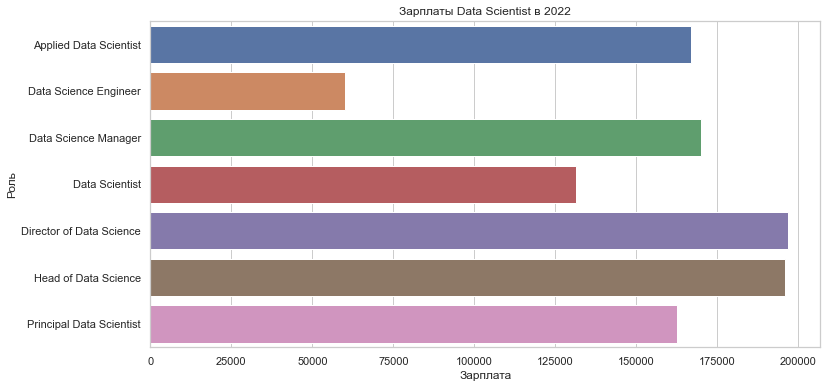

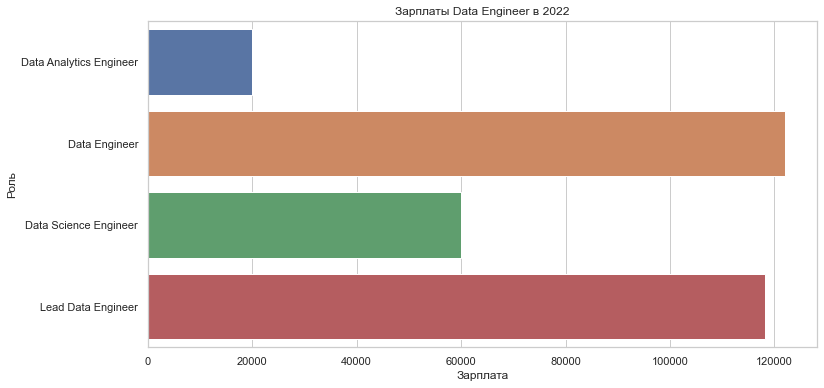

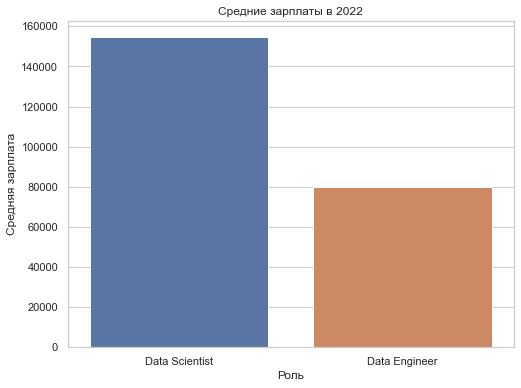

In [203]:
# Создание столбчатой диаграммы для данных Data Scientist в 2022
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data_scientist_2022, x='salary', y='job_title', orient='h')
plt.title('Зарплаты Data Scientist в 2022')
plt.xlabel('Зарплата')
plt.ylabel('Роль')

# Отображение графика
plt.show()

# Создание столбчатой диаграммы для данных Data Engineer в 2022
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data_engineer_2022, x='salary', y='job_title', orient='h')
plt.title('Зарплаты Data Engineer в 2022')
plt.xlabel('Зарплата')
plt.ylabel('Роль')

# Отображение графика
plt.show()

# Вычисление средних зарплат для сравнения
avg_salary_scientist = grouped_data_scientist_2022[grouped_data_scientist_2022['salary']<300000]['salary'].mean()
avg_salary_engineer = grouped_data_engineer_2022[grouped_data_engineer_2022['salary']<300000]['salary'].mean()

# Создание графика сравнения средних зарплат
plt.figure(figsize=(8, 6))
sns.barplot(x=['Data Scientist', 'Data Engineer'], y=[avg_salary_scientist, avg_salary_engineer])
plt.title('Средние зарплаты в 2022')
plt.xlabel('Роль')
plt.ylabel('Средняя зарплата')

# Отображение графика
plt.show()

На первых двух графиках мы видим, что в данных областях зарплаты руководителей/сотрудников вышестоящей должности также выше. На третьем графике видим, что средняя зарплата Data Scientist в 2022 году выше, чем у Data Engineer.

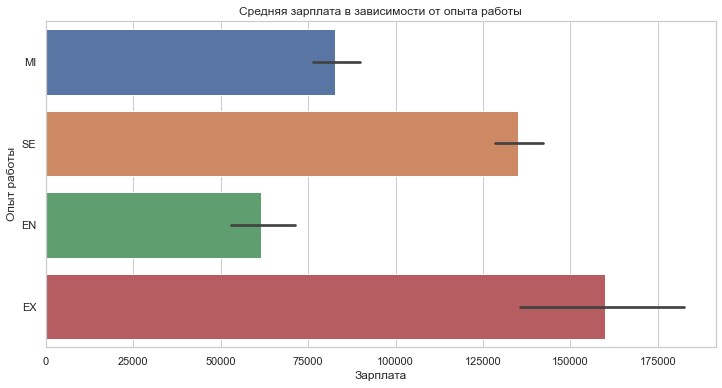

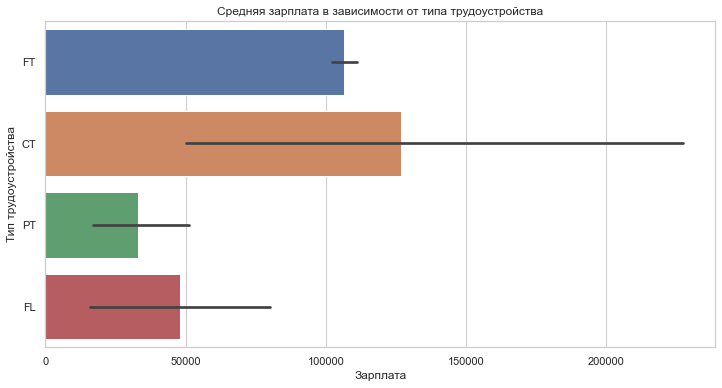

In [204]:
# Построим стобчатые диаграммы и посмотрим на зависимость зарплат от опыта работы и типа трудоустройства, предварительно сгруппировав данные
# Здесь и на последующих графиках будем рассматривать без выбросов (зарплата больше 300 тысяч)

data_filtered = data[data['salary'] < 300000]

# Построение столбчатой диаграммы для опыта работы
plt.figure(figsize=(12, 6))
sns.barplot(data=data_filtered, x='salary', y='experience_level', orient='h')
plt.title('Средняя зарплата в зависимости от опыта работы')
plt.xlabel('Зарплата')
plt.ylabel('Опыт работы')
plt.show()

# Построение столбчатой диаграммы для типа трудоустройства
plt.figure(figsize=(12, 6))
sns.barplot(data=data_filtered, x='salary', y='employment_type', orient='h')
plt.title('Средняя зарплата в зависимости от типа трудоустройства')
plt.xlabel('Зарплата')
plt.ylabel('Тип трудоустройства')
plt.show()

На первом графике видим, что з/п растет от уровня опыта, меньше всех получают Entry-level/Junior - среднее значение 62т, затем MI — Mid-level/Intermediate со средним значение 83т, и больше всех уже Senior-level/Expert и Executive-level/Director - 135т и 160т соответственно.  
Что касается типа трудоустройства, то видим, что люди на неполном рабочем дне зарабатывают меньше всех, затем идет фриланс, а больше всех получают те кто работает полный рабочий день и те, у кого контракт, их средние значения близки и равны соответственно 107т и 127т.

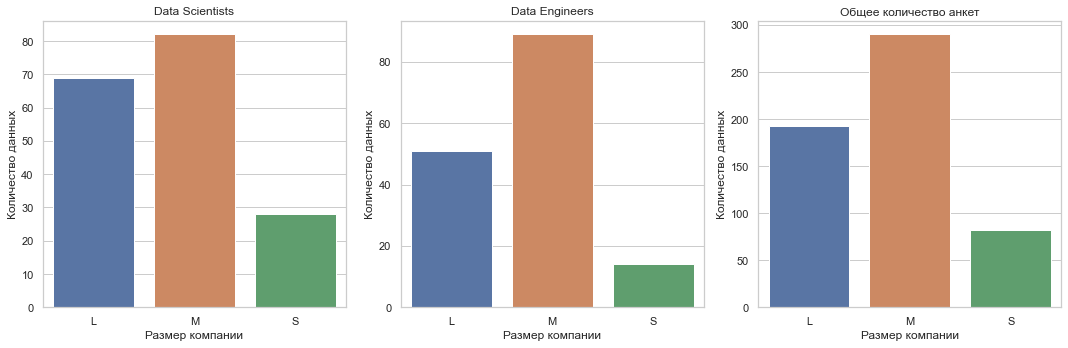

In [222]:
# Группировка данных и подсчет количества анкет для Data Scientist и Data Engineer
count_scientist = data_scientists.groupby('company_size').size().reset_index(name='count')
count_engineer = data_engineer.groupby('company_size').size().reset_index(name='count')

# Группировка данных и подсчет общего количества анкет по типу компании для data
count_company_type_data = data.groupby('company_size').size().reset_index(name='count')

# Создание подграфиков
plt.figure(figsize=(15, 5))

# График для Data Scientists
plt.subplot(131)
sns.barplot(x='company_size', y='count', data=count_scientist)
plt.title('Data Scientists')
plt.xlabel('Размер компании')
plt.ylabel('Количество данных')

# График для Data Engineers
plt.subplot(132)
sns.barplot(x='company_size', y='count', data=count_engineer)
plt.title('Data Engineers')
plt.xlabel('Размер компании')
plt.ylabel('Количество данных')

# График для общего количества анкет
plt.subplot(133)
sns.barplot(x='company_size', y='count', data=count_company_type_data)
plt.title('Общее количество анкет')
plt.xlabel('Размер компании')
plt.ylabel('Количество данных')

# Настройка расположения графиков
plt.tight_layout()

# Отображение графиков
plt.show()

Глядя на эти графики, видим, что в основном анкеты Data Scientists и Data Engineers из средних по величине компаний, в меньшей степени в больших и намного меньше в маленьких компаниях.

Опираясь на построенные графики можем сделать предварительный вывод, что заработная плата напрямую зависит от опыта работы и, соответственно, занимаемой роли. Также влияет тип трудоустройства, чем сотрудник больше работает, тем больше и получает, что логично. Обращая внимание на размер компании, можем выделить, что в средних по величине компаниях самая большая средняя зарплата, в самых больших незначительно меньше, в отличии от маленьких, где средняя зарплата меньше в 1.5 раза, такая же ситуация наблюдается у специалистов Data Science. Еще мы видим, что зарплаты Data Scientist значительно выше, чем зарплаты Data Engineer в 2022 году.Также самая большая средняя зарплата наблюдается у полностью удаленных сотрудников, а у сотрудников выполняющих 50% работы удаленно самыые маленькие зарплаты. Еще можем отметить рост зарплат с каждым годом. Также, можем отметить, что наличие должностей Data Scientists и Data Engineers распределяется следующим образом: в основном они есть в средних компаниях, значительно меньше в больших и почти отсутствуют в маленьких компаниях.Что касается зависимости от стран, то можем выделить только США, офисы из этой страны и сотрудники, у которых это основная страна проживания находятся в тройке лидеров по обоим показателям, скорее всего эти факторы не влияют на заработную плату.

ЧАСТЬ 2.2 СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ

In [211]:
# Для начала проверим гипотезу о повышении зарплат с годами

# Создаем списки зарплат по годам
salary_2020 = list(data[data['work_year'] == 2020]['salary']) # список зарплат за 2020 год
salary_2021 = list(data[data['work_year'] == 2021]['salary']) # список зарплат за 2021 год
salary_2022 = list(data[data['work_year'] == 2022]['salary']) # список зарплат за 2022 год

# Проверим данные на нормальное распределение
# задаём уровень значимости
alpha = 0.05 

# проводим тест Шапиро — Уилка
_, p20 = stats.shapiro(data['salary'])

print('p-value = %.3f' % (p20))

# интерпретируем результат
if p20 <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')



p-value = 0.000
Распределение не нормальное


In [212]:
#  Проведем непараметрические тесты Манна-Уитни
# задаём уровень значимости
alpha = 0.05 

# Напишем гипотезы
H1o = 'Зарплаты в 2020 году равны зарплатам в 2021 году'
H1a = 'Зарплаты в 2020 годы меньше, чем зарплаты в 2021 году'

H2o = 'Зарплаты в 2021 году равны зарплатам в 2022 году'
H2a = 'Зарплаты в 2021 годы меньше, чем зарплаты в 2022 году'

# проводим тест, сравним сначала данные 2020 и 2021 годов, а затем данные 2021 и 2022
_, p1 = stats.mannwhitneyu(salary_2020, salary_2021, alternative='less')

print('p-value = {:.3f}'.format(p1))

# интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)

_, p2 = stats.mannwhitneyu(salary_2021, salary_2022, alternative='less')

print('p-value = {:.3f}'.format(p2))

# интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H20)

p-value = 0.249
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Зарплаты в 2020 году равны зарплатам в 2021 году
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты в 2021 годы меньше, чем зарплаты в 2022 году


Проведя статистические тесты, мы отвергаем изначальный вывод о том, что зарплаты растут с каждым годом, сделанный по итогам визуального анализа. Можем сделать вывод, что в 2020 и 2021 году зарплаты были одинаковые, а в 2022 они выросли!

In [213]:
# Теперь проверим вывод о том, что зарплаты Data Scientist выше, чем Data Engineer в 2022 году.
# Для этого также воспользуемся тестом Манна-Уитни

# Создадим списки зарплат разных специалистов
salary_scientist_2022 = data_scientists2022['salary']
salary_engineer_2022 = data_engineer2022['salary']

# задаём уровень значимости
alpha = 0.05 

# Напишем гипотезы
Ho = 'Зарплаты Data Engineer в 2022 году равны зарплатам Data Scientist'
Ha = 'Зарплаты Data Engineer в 2022 году ниже, чем у Data Scientist'

# проводим тест, сравним сначала данные 2020 и 2021 годов, а затем данные 2021 и 2022
_, p1 = stats.mannwhitneyu(salary_engineer_2022, salary_scientist_2022, alternative='less')

print('p-value = {:.3f}'.format(p1))

# интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(Ha)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(Ho)

p-value = 0.022
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты Data Engineer в 2022 году ниже, чем у Data Scientist


Проведя статистический тест мы получили подтверждение нашей гипотезы о том, что зарплаты Data Scientist в 2022 год выше, чем у Data Engineer.

In [214]:
# Теперь проверим как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров
# Cначала проведем тест Краскела-Уоллиса чтобы проверить гиппотезу о том, что зарплаты в компаниях различных размеров неодинаковы

# Задаём уровень значимости
alpha = 0.05 

# Формулируем гипотезы
Ho = 'Зарплаты Data Scientitst одинаковые в компаниях различных размеров неодинаковы'
Ha = 'Зарплаты Data Scientitst в компаниях различных размеров неодинаковы'

# Создаем списки зарплат
scientist_salary_small = data_scientists[data_scientists['company_size'] == 'S']['salary']
scientist_salary_medium = data_scientists[data_scientists['company_size'] == 'M']['salary']
scientist_salary_large = data_scientists[data_scientists['company_size'] == 'L']['salary']

# проводим тест
_, p = stats.kruskal(scientist_salary_small, scientist_salary_medium, scientist_salary_large)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(Ha)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(Ho)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты Data Scientitst в компаниях различных размеров неодинаковы


По итогам статистического теста подтверждаем нашу гипотезу о том, что в различных размерах компаниях зарплаты Data Scientist неодинаковые.

In [215]:
# Проведем тесты Манна-Уитни и сравним зарплаты Data Scientist в различных размерах компаниях
# задаём уровень значимости
alpha = 0.05 

# Напишем гипотезы
H1o = 'Зарплаты в маленьких и больших компаниях одинаковые у Data Scientist.'
H1a = 'Зарплаты у Data Scientist в маленьких компаниях меньше, чем в больших.'

H2o = 'Зарплаты в средних и больших компаниях одинаковые у Data Scientist.'
H2a = 'Зарплаты у Data Scientist в больших компаниях меньше, чем в средних.'

# проводим тесты, сравним сначала зарплаты в маленьких и больших компаниях, а затем в средних и больших
_, p1 = stats.mannwhitneyu(scientist_salary_small, scientist_salary_large, alternative='less')

print('p-value = {:.3f}'.format(p1))

# интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)
_, p2 = stats.mannwhitneyu(scientist_salary_large, scientist_salary_medium, alternative='less')

print('p-value = {:.3f}'.format(p2))

# интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H2o)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты у Data Scientist в маленьких компаниях меньше, чем в больших.
p-value = 0.145
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Зарплаты в средних и больших компаниях одинаковые у Data Scientist.


По итогам статистических тестов частично подтверждаем наши визуальные выводы по поводу разницы зарплат в различных типах компаний. Делаем вывод, что в средних и больших компаниях зарплаты одинаковые, а в маленьких зарплаты меньше.

In [216]:
# Создание контингентных таблиц
contingency_table1 = pd.crosstab(data['company_size'], data['has_data_scientist'])
contingency_table2 = pd.crosstab(data['company_size'], data['has_data_engineer'])

# Задаём уровень значимости
alpha = 0.05 

# Сформулируем гипотезы
H1o = 'Наличие Data Scientist в компании не зависит от её размера. То есть, размер компании и наличие Data Scientist независимы.'
H1a = 'Наличие Data Scientist в компании зависит от её размера. То есть, размер компании и наличие Data Scientist зависимы.'

H2o = 'Наличие Data Engineer в компании не зависит от её размера. То есть, размер компании и наличие Data Engineer независимы.'
H2a = 'Наличие Data Engineer в компании зависит от её размера. То есть, размер компании и наличие Data Engineer зависимы.'

# Проведение Хи-квадрат тестов
_, p1, _, _ = chi2_contingency(contingency_table1)

print('p-value = {:.3f}'.format(p1))

# Интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)

_, p2, _, _ = chi2_contingency(contingency_table2)

print('p-value = {:.3f}'.format(p2))

# Интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H2o)


p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Наличие Data Scientist в компании не зависит от её размера. То есть, размер компании и наличие Data Scientist независимы.
p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Наличие Data Engineer в компании не зависит от её размера. То есть, размер компании и наличие Data Engineer независимы.


По итогам статистических тестов можем сделать вывод, что наличие должностей Data Science и Data Engineer не влияют на размер компании.

In [217]:
# Проверим влияет ли показатель удаленной работы на размер зарплаты
# Cначала проведем тест Краскела-Уоллиса 

# Задаём уровень значимости
alpha = 0.05 

# Формулируем гипотезы
Ho = 'Зарплаты одинаковые независимо от количества выполняемой работы удаленно'
Ha = 'Зарплаты отличаются в зависимости от количства выполняемой работы удаленно'

# Создаем списки зарплат
non_distant = data_scientists[data_scientists['remote_ratio'] == 0]['salary']
half_distant = data_scientists[data_scientists['remote_ratio'] == 50]['salary']
full_distant = data_scientists[data_scientists['remote_ratio'] == 100]['salary']

# проводим тест
_, p = stats.kruskal(non_distant, half_distant, full_distant)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(Ha)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(Ho)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты отличаются в зависимости от количства выполняемой работы удаленно


По итогам теста видим, что тип работы влият на зарплату. Дальше проверим наши предположения о том, что самые большие зарплаты у полностью удаленных сотрудников, а у сотрудников выполняющих 50% работы удаленно самые маленькие зарплаты.

In [218]:
# Проведем тесты Манна-Уитни и сравним зарплаты в зависимости от типа работы
# задаём уровень значимости
alpha = 0.05 

# Напишем гипотезы
H1o = 'Зарплаты у сотрудников выполняющих 50% работы удаленно равны заплатам полностью удаленных сотрудников.'
H1a = 'Зарплаты у сотрудников выполняющих 50% работы удаленно меньше, чем заплаты полностью удаленных сотрудников.'

H2o = 'Зарплаты у сотрудников выполняющих 50% работы удаленно равны заплатам сотрудников у которых нет удаленной работы.'
H2a = 'Зарплаты у сотрудников выполняющих 50% работы удаленно меньше, чем заплаты сотрудников у которых нет удаленной работы.'

H3o = 'Зарплаты у сотрудников, у которых нет удаленной работы равны зарплатам полностью удаленных.'
H3a = 'Зарплаты у сотрудников, у которых нет удаленной работы меньше, чем у полностью удаленных.'

# проводим тесты, сравним сначала зарплаты в маленьких и больших компаниях, а затем в средних и больших
_, p1 = stats.mannwhitneyu(half_distant, full_distant, alternative='less')

print('p-value = {:.3f}'.format(p1))

# интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)
    
_, p2 = stats.mannwhitneyu(half_distant, non_distant, alternative='less')

print('p-value = {:.3f}'.format(p2))

# интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H2o)

_, p3 = stats.mannwhitneyu(non_distant, full_distant, alternative='less')

print('p-value = {:.3f}'.format(p3))

# интерпретируем результат
if p3 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H3a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H3o)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты у сотрудников выполняющих 50% работы удаленно меньше, чем заплаты полностью удаленных сотрудников.
p-value = 0.009
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты у сотрудников выполняющих 50% работы удаленно меньше, чем заплаты сотрудников у которых нет удаленной работы.
p-value = 0.047
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты у сотрудников, у которых нет удаленной работы меньше, чем у полностью удаленных.


Таким образом полностью подтвердили, что самые большие зарплаты у полностью удаленных, а самые маленькие у тех, кто выполняет 50% работы удаленно.

In [219]:
# Дальше проверим как опыт работы влияет на зарплату, будем сравнивать три категории: Entry-level/Junior, Mid-level/Intermediate и SE — Senior-level/Expert + Executive-level/Director
# Проверим вывод о том, что меньше всех получают люди на начальных этапах карьеры, а больше всех те, кто имеет большой опыт или занимающих руководящие должности

# задаём уровень значимости
alpha = 0.05 

# Создаем списки зарплат
junior = data_scientists[data_scientists['experience_level'] == 'EN']['salary']
intermediate = data_scientists[data_scientists['experience_level'] == 'MI']['salary']
expert_director = data_scientists[(data_scientists['experience_level'] == 'SE') | (data_scientists['experience_level'] == 'EX')]['salary']

# Напишем гипотезы
H1o = 'Зарплаты на начальных должностях равны зарплатам на средних.'
H1a = 'Зарплаты на начальных должностях меньше, чем на средних.'

H2o = 'Зарплаты на начальных должностях равны зарплатам на высоких.'
H2a = 'Зарплаты на начальных должностях меньше, чем на высоких.'

H3o = 'Зарплаты на средних должностях равны зарплатам на высоких.'
H3a = 'Зарплаты на средних должностях меньше, чем на высоких.'

# проводим тесты, сравним сначала зарплаты в маленьких и больших компаниях, а затем в средних и больших
_, p1 = stats.mannwhitneyu(junior, intermediate, alternative='less')

print('p-value = {:.3f}'.format(p1))

# интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)
    
_, p2 = stats.mannwhitneyu(junior, expert_director, alternative='less')

print('p-value = {:.3f}'.format(p2))

# интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H2o)

_, p3 = stats.mannwhitneyu(intermediate, expert_director, alternative='less')

print('p-value = {:.3f}'.format(p3))

# интерпретируем результат
if p3 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H3a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H3o)

p-value = 0.006
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты на начальных должностях меньше, чем на средних.
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты на начальных должностях меньше, чем на высоких.
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
Зарплаты на средних должностях меньше, чем на высоких.


Таким образом мы подтвердили наши гипотезы. Самые большие зарплаты у тех, кто имеет большой опыт/занимают руководящие должности, а самые маленнькие у тех, кто занимает начальные должности.

In [220]:
# Теперь проверим как влияет тип трудоустройства на заработнуюу плату. Будем рассматривать три категории: неполный рабочий день, фриланс и контракт/полный рабочий день
# Проверим предположение о том, что самый маленькие зарплаты у тех, кто на неполном рабочем дне, а самые большие у тех, кто на полном рабочем дне или те, у кого контракт

# Задаём уровень значимости
alpha = 0.05 

# Создаем списки зарплат
part = data_scientists[data_scientists['employment_type'] == 'PT']['salary']
free = data_scientists[data_scientists['employment_type'] == 'FL']['salary']
full = data_scientists[(data_scientists['employment_type'] == 'CT') | (data_scientists['employment_type'] == 'FT')]['salary']

# Напишем гипотезы
H1o = 'Зарплаты у тех, кто на неполном рабочем дне равны тем, кто на полном/контракте.'
H1a = 'Зарплаты у тех, кто на неполном рабочем дне меньше, чем у тех, кто на полном/контракте.'

H2o = 'Зарплаты у тех, кто на неполном рабочем дне равны тем, кто на фрилансе.'
H2a = 'Зарплаты у тех, кто на неполном рабочем дне меньше, чем у тех, кто на фрилансе.'

H3o = 'Зарплаты у тех, кто на фрилансе равны тем, кто на полном рабочем дне/контракте.'
H3a = 'Зарплаты у тех, кто на фрилансе меньше, чем у тех, кто на полном рабочем дне/контракте.'

# Проводим тесты, сравним сначала зарплаты в маленьких и больших компаниях, а затем в средних и больших
_, p1 = stats.mannwhitneyu(part, full, alternative='less')

print('p-value = {:.3f}'.format(p1))

# Интерпретируем результат
if p1 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H1a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H1o)
    
_, p2 = stats.mannwhitneyu(part, free, alternative='less')

print('p-value = {:.3f}'.format(p2))

# Интерпретируем результат
if p2 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H2a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H2o)

_, p3 = stats.mannwhitneyu(free, full, alternative='less')

print('p-value = {:.3f}'.format(p3))

# Интерпретируем результат
if p3 <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    print(H3a)
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    print(H3o)

p-value = 0.112
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Зарплаты у тех, кто на неполном рабочем дне равны тем, кто на полном/контракте.
p-value = 0.500
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Зарплаты у тех, кто на неполном рабочем дне равны тем, кто на фрилансе.
p-value = 0.422
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Зарплаты у тех, кто на фрилансе равны тем, кто на полном рабочем дне/контракте.


По итогам тестов не подтверждаем нашу гипотезу, зарплата не зависит от типа трудоустройства.

ВЫВОДЫ.  

Проведя визуальный и статистичский анализ данных мы можем сделать следующие выводы:  
1) На зарплату влияют такие факторы, как опыт работы, чем он больше, тем больше зарплата.  
2) Общий ообъем работы, выполняемой удаленно. Самые большие зарплаты у полностью удаленных сотрудников, а самые маленькие у тех, кто выполняет 50% удаленно.  
3) Размер компании. В средних и больших компаниях самые большие зарплаты.  
Отвечаем на поставленные вопросы:  
В 2020 и 2021 году были равные зарплаты, в 2022 произошел рост зарплат.  
В 2022 году зарплаты Data Scientist больше, чем зарплаты Data Engineer.  
Зарплаты специалистов Data Scientist больше в средних и больших компаниях, нежели в маленьких.  
Связи между наличием должностей Data Scientist и Data Engineer и размером компании нет.